In [1]:
import pandas as pd

fake = pd.read_csv('Fake.csv')
true = pd.read_csv('True.csv')

In [2]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [3]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
fake['subject'].unique()

array(['News', 'politics', 'Government News', 'left-news', 'US_News',
       'Middle-east'], dtype=object)

In [5]:
true['subject'].unique()

array(['politicsNews', 'worldnews'], dtype=object)

In [6]:
true.shape

(21417, 4)

In [7]:
fake.shape

(23481, 4)

In [8]:
true.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [9]:
fake.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [10]:
import re

def clean_true_text(text):
    # remove everything up to and including first dash
    text = re.sub(r'^.*?- ', '', text)
    # convert into lowercase 
    text = text.lower()
    # remove extra spaces + trim spaces at start/end
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [11]:
true['clean_text'] = true['text'].apply(clean_true_text)

In [12]:
true[['text', 'clean_text']].head()

,text,clean_text
0,WASHINGTON (Reuters) - The head of a conservat...,the head of a conservative republican faction ...
1,WASHINGTON (Reuters) - Transgender people will...,transgender people will be allowed for the fir...
2,WASHINGTON (Reuters) - The special counsel inv...,the special counsel investigation of links bet...
3,WASHINGTON (Reuters) - Trump campaign adviser ...,trump campaign adviser george papadopoulos tol...
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,president donald trump called on the u.s. post...


In [13]:
def clean_fake_text(text):
    text = text.lower()
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [14]:
fake['clean_text'] = fake['text'].apply(clean_fake_text)

In [15]:
fake[['text', 'clean_text']].head()

,text,clean_text
0,Donald Trump just couldn t wish all Americans ...,donald trump just couldn t wish all americans ...
1,House Intelligence Committee Chairman Devin Nu...,house intelligence committee chairman devin nu...
2,"On Friday, it was revealed that former Milwauk...","on friday, it was revealed that former milwauk..."
3,"On Christmas day, Donald Trump announced that ...","on christmas day, donald trump announced that ..."
4,Pope Francis used his annual Christmas Day mes...,pope francis used his annual christmas day mes...


In [16]:
# true.drop(columns = ['title', 'text', 'subject', 'date'])     # dropping remaining columns

true['label'] = 1

In [17]:
true = true[['clean_text', 'label']]

In [18]:
true.head(3)

,clean_text,label
0,the head of a conservative republican faction ...,1
1,transgender people will be allowed for the fir...,1
2,the special counsel investigation of links bet...,1


In [19]:
fake['label'] = 0

In [20]:
fake = fake[['clean_text', 'label']]
fake.head(3)

,clean_text,label
0,donald trump just couldn t wish all americans ...,0
1,house intelligence committee chairman devin nu...,0
2,"on friday, it was revealed that former milwauk...",0


In [21]:
true['label'].value_counts()

label
1    21417
Name: count, dtype: int64

In [22]:
fake['label'].value_counts()

label
0    23481
Name: count, dtype: int64

#### Merging the datasets 

In [23]:
df = pd.concat([true, fake], axis = 0)   # axis = 0 stacks rows vertically

#### Reset index

reset_index(drop = True) -> re-numbers pages cleanly and throw away the old numbers

In [24]:
df.reset_index(drop = True)

,clean_text,label
0,the head of a conservative republican faction ...,1
1,transgender people will be allowed for the fir...,1
2,the special counsel investigation of links bet...,1
3,trump campaign adviser george papadopoulos tol...,1
4,president donald trump called on the u.s. post...,1
...,...,...
44893,21st century wire says as 21wire reported earl...,0
44894,21st century wire says it s a familiar theme. ...,0
44895,patrick henningsen 21st century wireremember w...,0
44896,21st century wire says al jazeera america will...,0


#### Shuffle the dataset

In [25]:
df = df.sample(frac = 1, random_state = 42).reset_index(drop = True)

- frac = 1 -> take 100% of rows just shuffled
- random_state -> reproducible results

In [26]:
df.head()

,clean_text,label
0,"donald trump s white house is in chaos, and th...",0
1,now that donald trump is the presumptive gop n...,0
2,mike pence is a huge homophobe. he supports ex...,0
3,california attorney general xavier becerra sai...,1
4,twisted reasoning is all that comes from pelos...,0


In [27]:
df['label'].value_counts()

label
0    23481
1    21417
Name: count, dtype: int64

In [28]:
df.shape

(44898, 2)

> Now, in the df dataset clean_text is my input(X) and label is output(y)

We have to apply TF-IDF to clean_text(X).

- TF-IDF converts X into numeric matrix.
- This creates the features the model can learn from.

#### Seperate input X and output y

In [29]:
X = df['clean_text']    # input text
y = df['label']         # output labels

- X -> what model reads 
- y -> what model predicts (fake = 0, true = 1)

## Using TF-IDF Vectorizer (Term Frequency - Inverse Document Frequency)

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [31]:
# Create the TF-IDF object

tfidf = TfidfVectorizer(max_features = 5000, ngram_range = (1, 2), stop_words = 'english')

> max_features = 5000 means keep only the top 5000 most important words across the dataset.

> ngram_range = (1, 2) means considering single words and pair of words

In [32]:
# Apply TF-IDF

X_tfidf = tfidf.fit_transform(X)

Here X_tfidf is a sparse matrix not a dataframe

In [33]:
X_tfidf.shape

(44898, 5000)

(no.of articles, no.of features)

- Most values are zero
- Only important words have non-zero

In [34]:
# Peeking inside TF-IDF

tfidf.get_feature_names_out()[:20]

array(['00', '00 pm', '000', '000 people', '10', '10 000', '10 percent',
       '10 years', '100', '100 000', '11', '12', '120', '13', '14', '15',
       '150', '16', '17', '18'], dtype=object)

In [35]:
X_tfidf[0]

<1x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 127 stored elements in Compressed Sparse Row format>

## Train Test Split

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size = 0.2, random_state = 42) 

In [37]:
X_train.shape   # training

(35918, 5000)

In [38]:
X_test.shape    # testing

(8980, 5000)

## Using Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter = 1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [40]:
# Make predictions

y_pred = model.predict(X_test)

In [41]:
# Evaluate the model 

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      4669
           1       0.97      0.99      0.98      4311

    accuracy                           0.98      8980
   macro avg       0.98      0.98      0.98      8980
weighted avg       0.98      0.98      0.98      8980



- Precision(Fake) -> When model says Fake how often it is right?
- Recall(Fake) -> How many fake news articles did it catch?
- f1-score -> Balance btw precision & recall

> My fake news detection model uses TF-IDF to capture word-usage patterns and Logistic Regression to learn weights for those patterns.
It achieves balanced precision and recall around 98%, meaning it both catches fake news and avoid misclassifying real news.

### Confusion Matrix

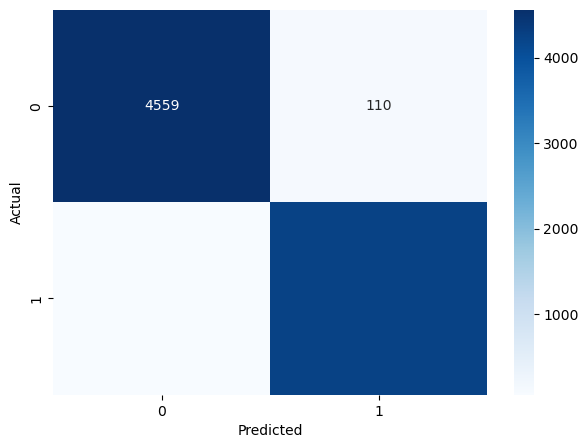

In [42]:
# Next, we are using confusion matrix so that we can see mistakes 

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize = (7, 5))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [43]:
cm

array([[4559,  110],
       [  56, 4255]], dtype=int64)

### Top words pushing Fake vs Real

In [44]:
feature_names = tfidf.get_feature_names_out()

These are the actual words / bigrams learned from the model.

In [45]:
coefficients = model.coef_[0]

In [46]:
model.coef_[0]

array([-0.57124238, -0.43869351,  0.12500579, ..., -0.02111355,
        0.56682758,  1.49276538])

In [47]:
model.coef_.shape

(1, 5000)

In [48]:
# Combine words + weights

weights_df = pd.DataFrame({'word': feature_names, 'weight': coefficients})
weights_df.tail()

,word,weight
4995,zimbabwe,1.045801
4996,zone,-0.031242
4997,zones,-0.021114
4998,zor,0.566828
4999,zuma,1.492765


#### Top words through Fake news

In [49]:
weights_df.sort_values(by = 'weight').head(15)

,word,weight
3585,read,-6.795663
2438,just,-6.220730
3378,president trump,-5.801095
1943,gop,-5.603584
2192,image,-5.438921
1710,featured image,-5.391893
1709,featured,-5.240526
2896,mr,-5.056150
2091,hillary,-4.476035
907,com,-4.436720


#### Top words through Real news

In [50]:
weights_df.sort_values(by= 'weight', ascending = False).head(15)

,word,weight
3892,said,16.470883
3371,president donald,7.565848
3792,reuters,6.536838
4882,wednesday,6.503369
4523,thursday,6.170683
4668,tuesday,5.976093
1854,friday,5.540384
3720,republican,4.962254
2868,monday,4.720528
1460,edt,4.661527


### Analyse misclassified articles

In [53]:
results = df.loc[y_test.index].copy()
results['predicted'] = y_pred
results.head()

,clean_text,label,predicted
22216,u.s. president donald trump did not discuss “s...,1,1
27917,"welcome to trump s america, a.k.a. trumplandia...",0,0
25007,the election result tonight is hard to swallow...,0,0
1377,the republican national committee is withdrawi...,1,1
32476,the plans for the republican convention have s...,0,0


#### Extract misclassified rows

In [55]:
misclassified = results[ results['label'] != results['predicted']]

In [58]:
misclassified.shape

(166, 3)

#### Analyse fake as real

In [65]:
fake_as_real = misclassified[ (misclassified['label'] == 0) & (misclassified['predicted'] == 1)]
fake_as_real['clean_text'].head(5)

38806    governor chris christie wasted no time after s...
31491    a nervous nancy pelosi responded thursday to c...
22935    the anti-establishment tide is rolling across ...
16145    counterfeiting is illegal by the way and shoul...
16168    hey bernie the first step in fighting corrupti...
Name: clean_text, dtype: object

#### Analyse real as fake errors

In [67]:
real_as_fake = misclassified[(misclassified['label'] == 1) & (misclassified['predicted'] == 0)]
real_as_fake['clean_text'].head(5)

28532    u.s. first lady melania trump praised the “emp...
19957    survivors of a blaze that killed 71 people six...
10984    u.s. president donald trump told cia officers ...
26037    bailey white, 13, stood patiently in line with...
30834    the mayor of paris, where a landmark global cl...
Name: clean_text, dtype: object

> Misclassified examples reveal the limitations of TF-IDF-based fake news detection, showing that stylistic similarity can override factual correctness.

## Misclassification Analysis

Fake articles predicted as Real tend to be written in a neutral,
professional tone similar to mainstream news sources.
Real articles predicted as Fake often contain emotional or
sensational wording.

This confirms that the model relies on linguistic patterns rather
than factual correctness.